In [1]:
from project_utilities import *
from emg_functions import *

[767, 769, 789, 794, 801, 998, 1001, 1005, 1020, 1022, 1249, 1252, 1255, 1257, 1533, 1538, 1542, 1559, 1562, 1566, 1788, 1793, 1807, 1827, 2009, 2013, 2043, 2045, 2047, 2274, 2277, 2281, 2297, 2524, 2528, 2551, 2554]
[768, 787, 793, 795, 802, 1000, 1004, 1019, 1021, 1024, 1250, 1254, 1256, 1279, 1535, 1541, 1555, 1560, 1563, 1567, 1792, 1806, 1814, 1828, 2012, 2035, 2044, 2046, 2048, 2276, 2280, 2296, 2301, 2525, 2549, 2553, 2555]
[]


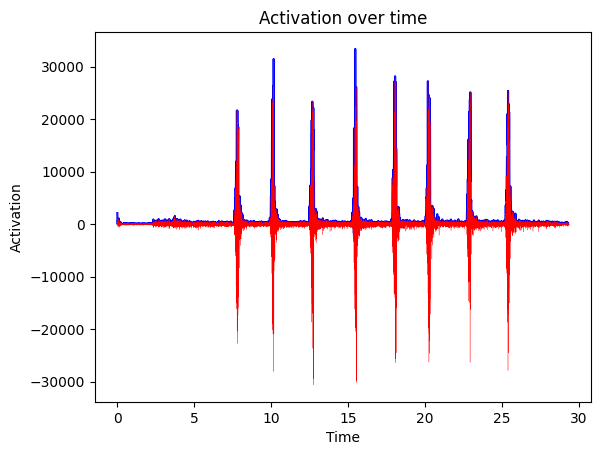

In [2]:
emgFilePath = 'opensignals_0007804b3c23_2024-09-09_15-04-53.txt'
#--- manuell open (in pipeline)
#Open and reads the file with the EMG data to a long text string and saves it to rawData. Closes the file at the end.
with open('opensignals_0007804b3c23_2024-09-09_15-04-53.txt', 'r') as file:     
    rawData = file.read()      
    file.close
    pass        
#---
signalThreshold = 35000
sampleRate = get_sample_rate(rawData)


dataWithHeader = get_emg_data(rawData,sampleRate)
timeAdjustedEmg = find_first_punch(dataWithHeader,signalThreshold) #adjusted data is [time:EMG data]

emgData = []
timeValues = []
for row in timeAdjustedEmg:
    timeValues.append(row[0])
    emgData.append(row[1])

#filterdSignal = find_first_punch(dataTable, threshold)
lowcut = 20
highcut = 450
adjustedEmg = apply_filter(emgData, lowcut, highcut, sampleRate) # adjustedEmg = filteredSignal

window = 10
diffThreashold = 7
envalopeValues,timeValuesEnvalope = envalope_emg(adjustedEmg,window,sampleRate)
zoomThreshold = 3000


muscleActivationTime = get_muscle_time(envalopeValues,zoomThreshold,window,sampleRate,diffThreashold)
print(muscleActivationTime)
plt.plot(timeValuesEnvalope, envalopeValues, "b")
plt.plot(timeValues,adjustedEmg, "r", lw = 0.2) 
plt.xlabel('Time')
plt.ylabel('Activation')
plt.title('Activation over time')
plt.show()